In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
# Step 1: Load a sample dataset
# For this example, we'll use the famous Iris dataset
df = sns.load_dataset('iris')

In [12]:
# Display the first few rows of the dataset
# print("First few rows of the dataset:")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['species']

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
# Step 2: Perform correlation analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()

In [16]:
# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
species           0.782561    -0.426658      0.949035     0.956547  1.000000


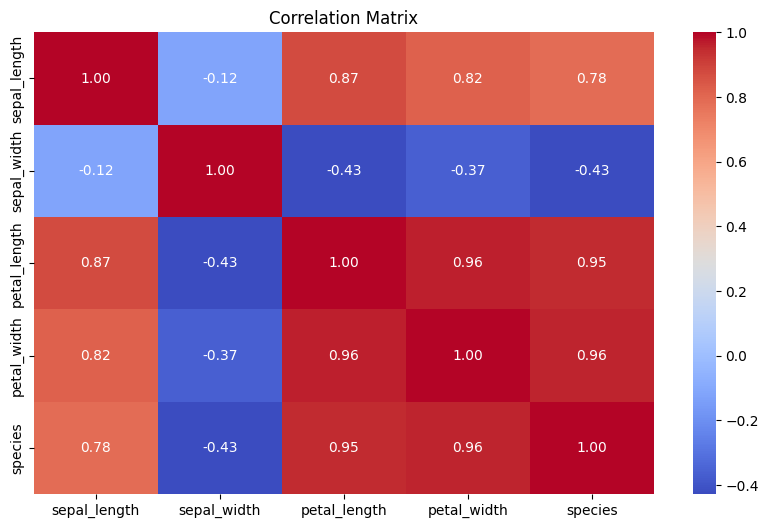

In [17]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Step 3: Conduct hypothesis testing
# Example: T-test to compare the means of two species for 'sepal_length'
species_1 = df[df['species'] == 0]['sepal_length']
species_2 = df[df['species'] == 1]['sepal_length']

In [42]:
species_1

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


In [43]:
species_2

,sepal_length
50,7.0
51,6.4
52,6.9
53,5.5
54,6.5
55,5.7
56,6.3
57,4.9
58,6.6
59,5.2


In [47]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(species_1, species_2)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-test Results:
T-statistic: -10.52098626754911
P-value: 8.985235037487079e-18


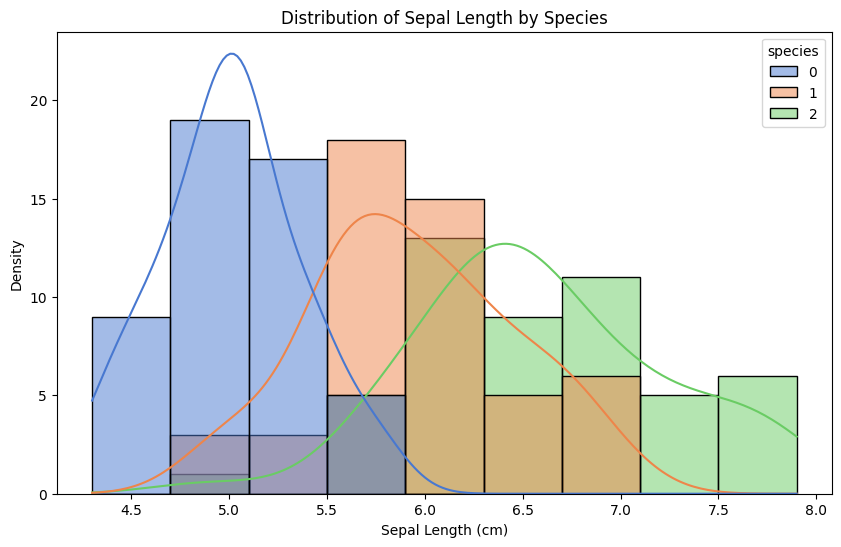

In [48]:
# Step 4: Visualize the results
# Distribution plot for 'sepal_length' by species
plt.figure(figsize=(10, 6))
sns.histplot(df, x='sepal_length', hue='species', kde=True, palette='muted')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

In [49]:
# Step 5: Summary of findings
summary = """
Summary of Findings:
1. Correlation Analysis:
   - The correlation matrix shows strong positive correlations between 'sepal_length' and 'petal_length', as well as between 'petal_length' and 'petal_width'.
   - No significant correlation is observed between 'sepal_width' and other features.

2. Hypothesis Testing:
   - A T-test was conducted to compare the mean sepal lengths of the 'setosa' and 'versicolor' species.
   - The T-statistic is {t_stat:.2f}, and the p-value is {p_value:.4f}.
   - Given that the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean sepal lengths of these two species.

3. Visualizations:
   - The correlation matrix was visualized using a heatmap, highlighting the strength of relationships between features.
   - The distribution of 'sepal_length' by species was visualized, showing distinct patterns across different species.
"""

print(summary.format(t_stat=t_stat, p_value=p_value))


Summary of Findings:
1. Correlation Analysis:
   - The correlation matrix shows strong positive correlations between 'sepal_length' and 'petal_length', as well as between 'petal_length' and 'petal_width'.
   - No significant correlation is observed between 'sepal_width' and other features.

2. Hypothesis Testing:
   - A T-test was conducted to compare the mean sepal lengths of the 'setosa' and 'versicolor' species.
   - The T-statistic is -10.52, and the p-value is 0.0000.
   - Given that the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean sepal lengths of these two species.

3. Visualizations:
   - The correlation matrix was visualized using a heatmap, highlighting the strength of relationships between features.
   - The distribution of 'sepal_length' by species was visualized, showing distinct patterns across different species.

